# Machine learning: logistic regression, linear and quadratic discriminant analysis

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np

In [4]:
run data_preprocessing.ipynb

In [10]:
X,y = data_preprocessing()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## 1. Logistic regression

In [14]:
def LogReg(X_train, y_train, X_test):
    classifier = LogisticRegression().fit(X_train, y_train)
    y_predicted = classifier.predict(X_test)
    return y_predicted

In [18]:
y_predicted_lr = LogReg(X_train, y_train, X_test)

/home/neiro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [19]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_predicted_lr)
print(mat)

[[92939     0]
 [ 1347     0]]


In [23]:
n_classes = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_predicted_lr)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [24]:
def ROCplot(title, fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

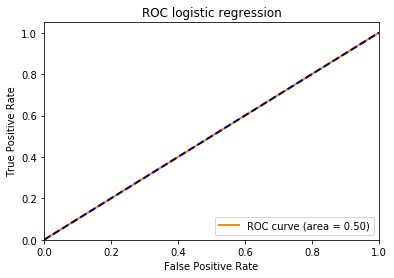

In [26]:
ROCplot("ROC logistic regression", fpr[0], tpr[0])

In [27]:
print(roc_auc[0])

0.5


## 2. Linear discriminant analysis

In [31]:
def LDA(X_train, y_train, X_test):
    classifier = LinearDiscriminantAnalysis()
    classifier = classifier.fit(X_train, y_train)
    y_predicted = classifier.predict(X_test)
    return y_predicted

In [32]:
y_predicted_lda = LDA(X_train, y_train, X_test)

/home/neiro/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [34]:
n_classes = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_predicted_lda)
    roc_auc[i] = auc(fpr[i], tpr[i])

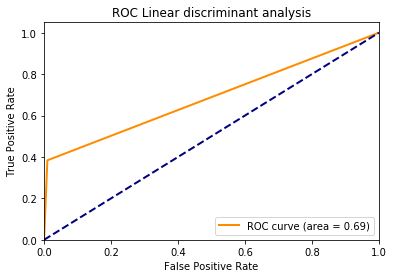

In [36]:
ROCplot("ROC Linear discriminant analysis", fpr[0], tpr[0])

In [37]:
print(roc_auc[0])

0.6869853599481992


## 3. Quadratic discriminant analysis

In [39]:
def QDA(X_train, y_train, X_test):
    classifier = QuadraticDiscriminantAnalysis()
    classifier = classifier.fit(X_train, y_train)
    y_predicted = classifier.predict(X_test)
    return y_predicted

In [40]:
y_predicted_qda = QDA(X_train, y_train, X_test)

In [43]:
n_classes = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_predicted_qda)
    roc_auc[i] = auc(fpr[i], tpr[i])

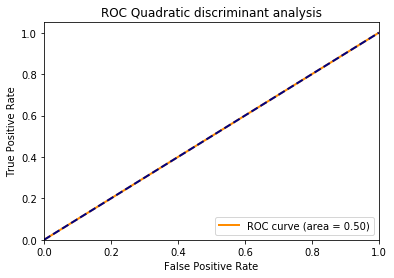

In [44]:
ROCplot("ROC Quadratic discriminant analysis", fpr[0], tpr[0])

In [45]:
print(roc_auc[0])

0.5000322792369188
